In [1]:
# Import Pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load the csv to a Pandas DataFrame
file_path = 'Resources/train_cleaned.csv'

# Load the dataset
train_data = pd.read_csv(file_path)

# Display 
train_data.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


In [3]:
# Check the data types of the columns
print(train_data.dtypes)


ID                            object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object


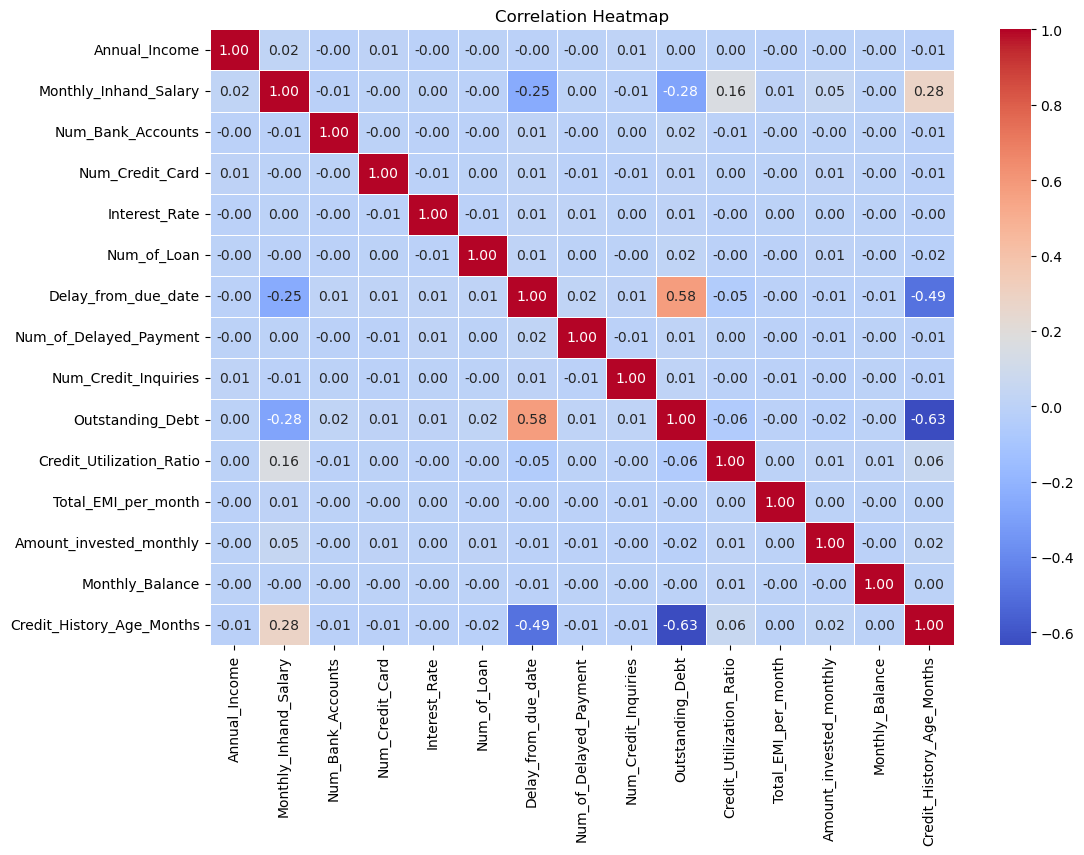

In [4]:
# Select only numerical columns for correlation
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()


Analysis:

This heatmap shows the correlation matrix of variables in our dataset, helping us understand the strength and direction of linear relationships between numerical variables. 

Outstanding_Debt vs Delay_from_due_date show a positive correlation(0.58). As outstanding debt increases, delays in payments aslo increase. Therefore, people with higher debts are more likely to experience payment delays.

Credit History Age Months vs Delay from due date have a negative correlation (-0.49). A longer credit history is associated with fewer payment delays. Implying that experienced borrowers may manage payments better.

Outstanding Debt vs Credit Utilization Ratio indicates a negative correlation as well (-0.63). High outstanding debt is often linked to lower credit utilization. Borrowers with high outstanding debt might already be at their credit limits.

Annual Income does not seem to a linear relationship with most variables since the correlation valuse are near 0. Income alone doesnt seem to drive behavior such as delays or credit utilization.

Num_Bank_Accounts and Num_Credit_Card have a correlation close to 0, indicating the nubmer of accounts or cards is not strongly tied to debt, payments, or utilization patterns. 

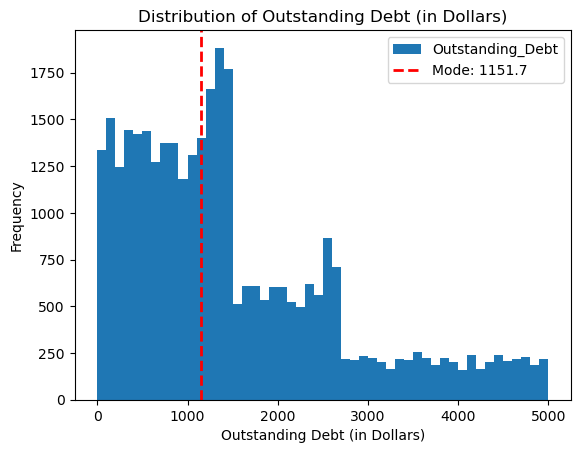

In [6]:
# Histogram
train_data['Outstanding_Debt'].plot(
    kind='hist',
    bins=50,
    title='Distribution of Outstanding Debt (in Dollars)'
)
plt.xlabel('Outstanding Debt (in Dollars)')
plt.ylabel('Frequency')
plt.axvline(x=1151.7, color='red', linestyle='dashed', linewidth=2, label=f'Mode: 1151.7')
plt.legend()

plt.show()


This histogram visualizes the distribution of outstanding debt among applicants. It helps us understand the range and fequency of debt levels in the dataset, which is a key factor in predicting creditworthiness. Most individuals have outstanding debt below $1500. The mode ($1151.7) corresponds to the most frequent outstanding debt value. The mean (1509.49) is greater than the median (1238.55) which is consistent with the histogram's right-skewed nature. The tail end of the distribution shows higher debt amounts ($3000-$5000) are less frequent. 

In [7]:
# Calculate mean, median, and mode for Outstanding_Debt
mean_value = train_data['Outstanding_Debt'].mean()
median_value = train_data['Outstanding_Debt'].median()
mode_value = train_data['Outstanding_Debt'].mode()[0]
std_dev = train_data['Outstanding_Debt'].std()

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_dev}")

Mean: 1509.489308114523
Median: 1238.55
Mode: 1151.7
Standard Deviation: 1192.8132488516508


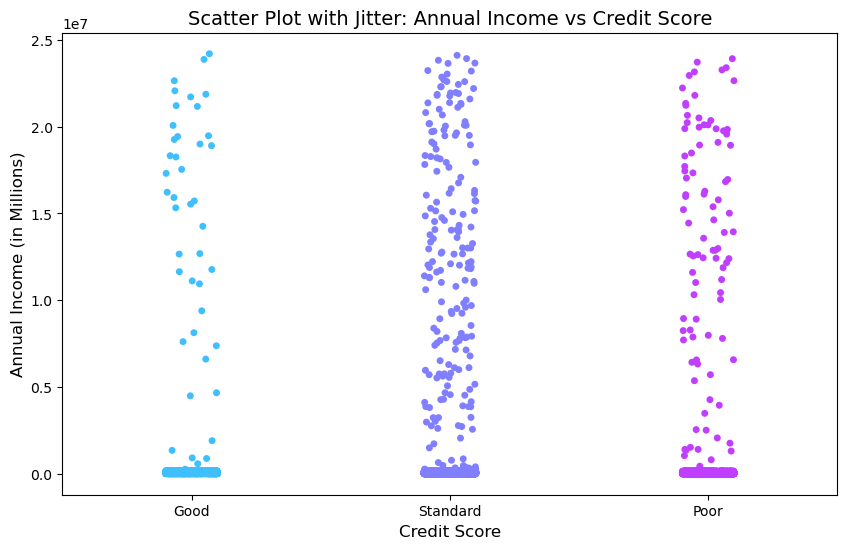

In [8]:
# Scatter plot of Income vs. Credit Score with jitter
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=train_data,
    x='Credit_Score',
    y='Annual_Income',
    hue='Credit_Score',
    palette='cool',
    jitter=True, 
    dodge=False  # Ensure no additional offsets
)

# Add title and labels
plt.title("Scatter Plot with Jitter: Annual Income vs Credit Score", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Annual Income (in Millions)", fontsize=12)


# Adjust x-axis labels to match perfectly
plt.xticks(ticks=[0, 1, 2], labels=["Good", "Standard", "Poor"], ha='center')  # Center align labels

# Show the plot without attempting to remove a nonexistent legend
plt.show()

This scatterplot visualizes the distrubtion of Annual Income across three categories of Credit Scores: Good, Standard, and Poor. 
It helps us to observe how income varies among individuals within these credit score groups, revealing potential patterns or differences. There is a noticeable clustering of points near lower income levels across all three groups, especially at incomes below $0.5 million. Individuals with a 'Good' credit score are more likely to have higher incomes compared to those in the 'Standard' and 'Poor' groups.

In [9]:
print(train_data['Annual_Income'].describe())

count    3.370500e+04
mean     1.728571e+05
std      1.423557e+06
min      7.005930e+03
25%      1.879334e+04
50%      3.614012e+04
75%      7.014454e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64


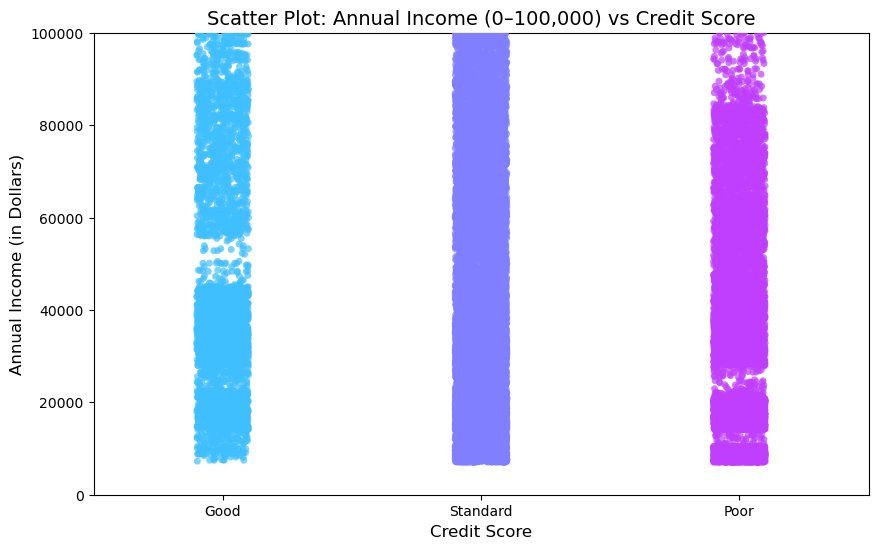

In [10]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=train_data[train_data['Annual_Income'] <= 100000],  # Focus on incomes <= 100,000
    x='Credit_Score',
    y='Annual_Income',
    hue='Credit_Score',
    palette='cool',
    alpha=0.7,
    jitter=True,
    dodge=False
)

# Add labels and title
plt.title("Scatter Plot: Annual Income (0–100,000) vs Credit Score", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Annual Income (in Dollars)", fontsize=12)

plt.ylim(0, 100000)  # Adjust y-axis to focus on 0–100,000
plt.show()


This scatterplot focuses on the dataset with annual income ranging from 0-100000. Higher annual incomes correlate with better credit scores ('Good'), while lower incomes are more common among 'Standard' and 'Poor' scores. The overlap between 'Standard' and 'Poor' scores indicates that income alone may not be sufficient to predict creditworthiness. Additional features like payment history or outstanding debt should also be considered.

In [11]:
# Count the number of individuals in each credit score category
credit_score_counts = train_data['Credit_Score'].value_counts()

# Display the counts
print(credit_score_counts)

Credit_Score
Standard    17801
Poor        10483
Good         5421
Name: count, dtype: int64
